In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
import gzip
import pickle

X,y = pickle.load(gzip.open('/content/flatland_train.data','rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0

In [14]:
NAME = "model".format(int(time.time()))
print(NAME)
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=3e-4),
              metrics=["accuracy"])
model.summary()

model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                247872    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)         

In [15]:
loss = model.fit(X, y, epochs=10, validation_split=0.25)  

Epoch 1/10
235/235 [==============================] - 29s 124ms/step - loss: 1.4752 - accuracy: 0.3567 - val_loss: 1.3179 - val_accuracy: 0.4376
Epoch 2/10
235/235 [==============================] - 29s 123ms/step - loss: 1.2840 - accuracy: 0.4473 - val_loss: 1.1641 - val_accuracy: 0.4844
Epoch 3/10
235/235 [==============================] - 22s 94ms/step - loss: 1.0966 - accuracy: 0.5403 - val_loss: 0.9408 - val_accuracy: 0.6152
Epoch 4/10
235/235 [==============================] - 19s 83ms/step - loss: 0.8787 - accuracy: 0.6352 - val_loss: 0.7171 - val_accuracy: 0.6956
Epoch 5/10
235/235 [==============================] - 18s 77ms/step - loss: 0.6936 - accuracy: 0.7165 - val_loss: 0.5720 - val_accuracy: 0.7572
Epoch 6/10
235/235 [==============================] - 15s 64ms/step - loss: 0.5739 - accuracy: 0.7624 - val_loss: 0.4702 - val_accuracy: 0.8112
Epoch 7/10
235/235 [==============================] - 18s 74ms/step - loss: 0.4903 - accuracy: 0.7995 - val_loss: 0.4154 - val_accurac

In [16]:
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 90.95%


<AxesSubplot:>

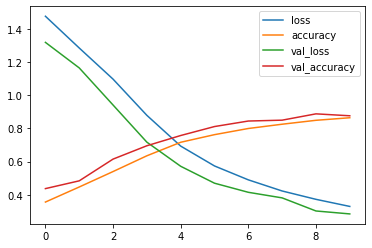

In [19]:
pd.DataFrame(loss.history).plot()

<AxesSubplot:>

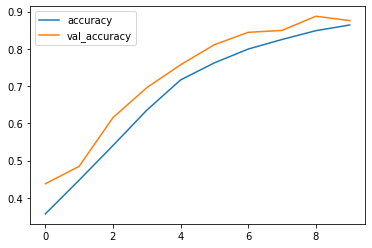

In [20]:
pd.DataFrame(loss.history)[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

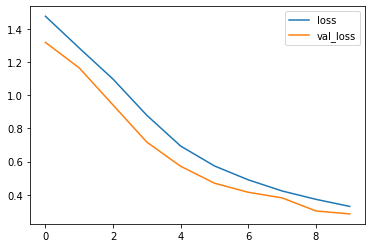

In [21]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [ ]:
model.save('model1.h5')

In [ ]:
from google.colab import files
files.download('model1.h5')